# This notebook recommends a user few profiles in an online dating site using content based recommendation system.
# The data is collected from http://www.occamslab.com/petricek/data/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
columns = ["userId","gender"]
gender = pd.read_csv("data/libimseti/gender.dat",sep = ",",names = columns)

In [4]:
columns_names = ["userId","profileId","rating"]
rating = pd.read_csv("data/libimseti/ratings.dat",sep = ",",names = columns_names)

In [5]:
rating.head()

,userId,profileId,rating
0,1,133,8
1,1,720,6
2,1,971,10
3,1,1095,7
4,1,1616,10


In [6]:
data = pd.merge(rating,gender,on = "userId")

In [7]:
data.head()

,userId,profileId,rating,gender
0,1,133,8,F
1,1,720,6,F
2,1,971,10,F
3,1,1095,7,F
4,1,1616,10,F


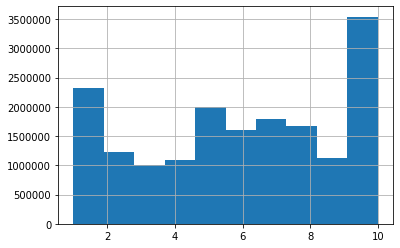

In [7]:
data["rating"].hist()

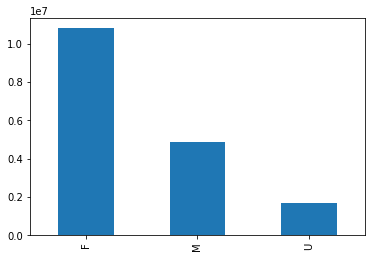

In [8]:
data["gender"].value_counts().plot(kind = "bar")

In [8]:
ratings_userid = pd.DataFrame(data.groupby("userId")["rating"].mean())

In [9]:
ratings_userid["Number_of_ratings"] = data.groupby("userId")["rating"].count()

In [10]:
ratings_userid.head()

,rating,Number_of_ratings
userId,,
1,6.510145,345
2,8.041237,97
3,7.150000,20
4,6.841584,101
5,8.419048,105


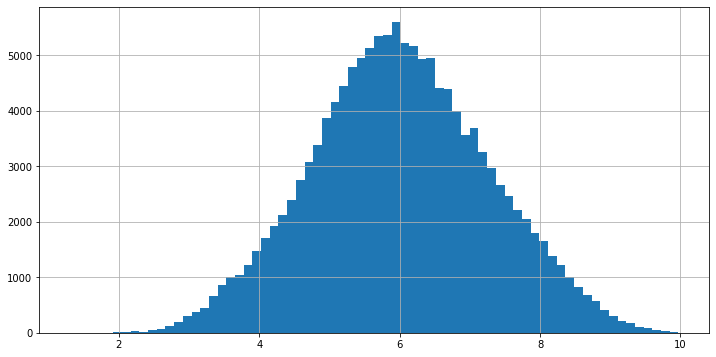

In [12]:
plt.figure(figsize = (12,6))
ratings_userid['rating'].hist(bins= 70)

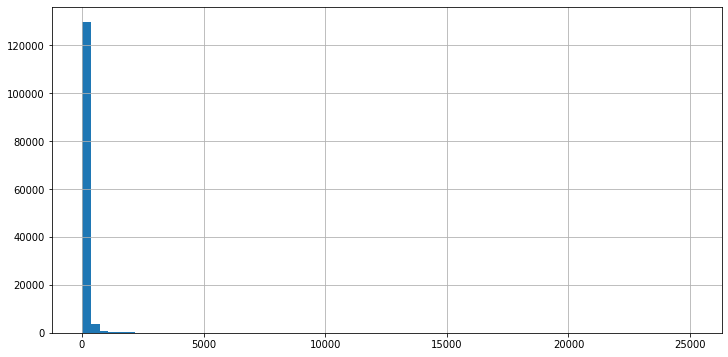

In [13]:
plt.figure(figsize = (12,6))
ratings_userid['Number_of_ratings'].hist(bins= 70)


In [11]:
ratings_profileid = pd.DataFrame(data.groupby("profileId")["rating"].mean())
ratings_profileid["Number_of_ratings"] = data.groupby("profileId")["rating"].count()

In [12]:
ratings_profileid.head()

,rating,Number_of_ratings
profileId,,
1,5.272727,22
2,7.150235,213
4,1.000000,1
8,7.500000,4
9,9.454545,22


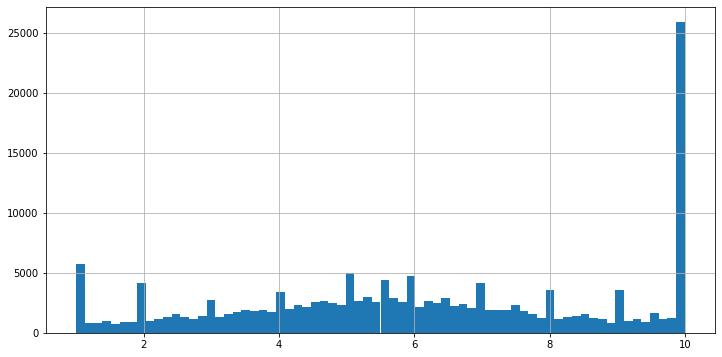

In [16]:
plt.figure(figsize = (12,6))
ratings_profileid['rating'].hist(bins= 70)

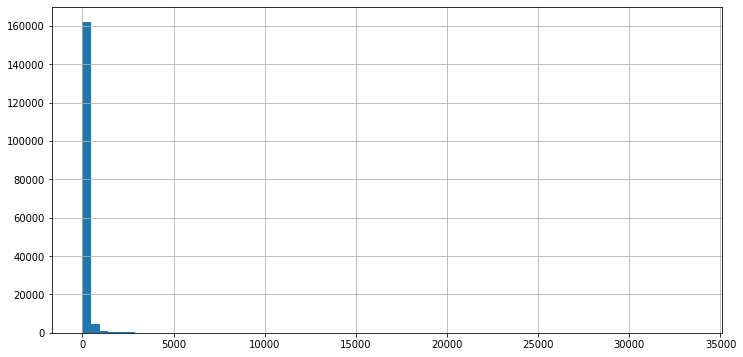

In [17]:
plt.figure(figsize = (12,6))
ratings_profileid['Number_of_ratings'].hist(bins= 70)

In [13]:
threshold = 2500
filter_data  = ratings_profileid.query('Number_of_ratings >=@threshold')
filter_data.describe()


,rating,Number_of_ratings
count,602.000000,602.000000
mean,7.204712,5005.415282
std,2.064846,3531.149502
min,1.009646,2502.000000
25%,5.997559,2964.250000
50%,7.277500,3836.000000
75%,8.881395,5455.250000
max,10.000000,33389.000000


In [14]:
filter_data.head()

,rating,Number_of_ratings
profileId,,
133,6.221250,6974
328,6.375118,10634
394,9.176272,2672
466,5.644139,2619
483,6.509434,6307


In [15]:
data.head()

,userId,profileId,rating,gender
0,1,133,8,F
1,1,720,6,F
2,1,971,10,F
3,1,1095,7,F
4,1,1616,10,F


In [16]:
data = pd.merge(filter_data,data, on = "profileId")
data.head()

,profileId,rating_x,Number_of_ratings,userId,rating_y,gender
0,133,6.22125,6974,1,8,F
1,133,6.22125,6974,2,10,F
2,133,6.22125,6974,88,9,F
3,133,6.22125,6974,176,5,F
4,133,6.22125,6974,185,4,F


In [34]:
rating_matrix = data.pivot_table(index = 'userId', columns = 'profileId',values = 'rating_y')
rating_matrix = rating_matrix.fillna(0)
rating_matrix.head()

profileId,133,328,394,466,483,767,907,1029,1347,1429,...,213358,213984,214874,215553,216006,216605,216793,216941,217516,219711
userId,,,,,,,,,,,,,,,,,,,,,
1,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
2,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
rating_matrix.shape

(134835, 602)

In [19]:
random = np.random.choice(rating_matrix.columns)

In [36]:
random = 122827

In [37]:
profile = rating_matrix[random]
similar_profiles = rating_matrix.corrwith(profile)
recommend = pd.DataFrame(similar_profiles, columns=['pearsonR'])
recommend.dropna(inplace=True)

In [38]:
recommend.head()

,pearsonR
profileId,
133,0.062208
328,0.135127
394,0.095222
466,0.009518
483,0.128036


In [39]:
recommend = recommend.join(ratings_profileid['Number_of_ratings'])
recommend = recommend.sort_values('pearsonR', ascending=False)

In [40]:
recommend[1:11]

,pearsonR,Number_of_ratings
profileId,,
122037,0.334822,7317
213984,0.284177,3150
26488,0.280546,2830
159305,0.277601,4100
105660,0.243144,4151
116926,0.241938,3400
155380,0.238164,11409
25119,0.237200,2509
132680,0.219505,2816


In [25]:
rating_matrix = rating_matrix.T

In [26]:
from scipy.sparse import csr_matrix
rating_features = csr_matrix(rating_matrix)

In [28]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(rating_features)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [30]:

query_index = np.random.choice(rating_matrix.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(rating_matrix.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

439


In [31]:

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(rating_matrix.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, rating_matrix.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 122827:

1: 122037, with distance of 0.641167321850409:
2: 213984, with distance of 0.6981896777967496:
3: 159305, with distance of 0.7020884822032809:
4: 26488, with distance of 0.7034353253068284:
5: 155380, with distance of 0.728499415655593:
